In [1]:
import os

In [2]:
data_dir = r'C:\Users\lenovo\Downloads\paddy_doctor'

In [3]:
os.listdir(data_dir)

['test_images', 'train_images']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To read images directly from train and test images we use matplotlib.image

In [5]:
from matplotlib.image import imread

In [6]:
train_path = os.path.join(data_dir,'train_images')
test_path = os.path.join(data_dir,'test_images')

In [7]:
train_path

'C:\\Users\\lenovo\\Downloads\\paddy_doctor\\train_images'

In [8]:
os.listdir(train_path)

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

train path has cateories of images

In [9]:
os.listdir(test_path)[:2]

['200001.jpg', '200002.jpg']

Test path has images that we need to categorize

No of images of each directory

In [10]:
for item in os.listdir(train_path):
    print(f"condition is {item} and images are {len(os.listdir(os.path.join(train_path,item)))}")

condition is bacterial_leaf_blight and images are 479
condition is bacterial_leaf_streak and images are 380
condition is bacterial_panicle_blight and images are 337
condition is blast and images are 1738
condition is brown_spot and images are 965
condition is dead_heart and images are 1442
condition is downy_mildew and images are 620
condition is hispa and images are 1594
condition is normal and images are 1764
condition is tungro and images are 1088


Lets look how hispa infected plant looks like

In [11]:
hispa_sample = os.listdir(os.path.join(train_path,'hispa'))[0]

In [12]:
hispa_sample

'100003.jpg'

For we need to read image and call imshow for showing

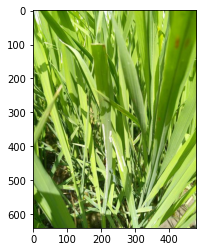

In [13]:
plt.imshow(plt.imread(os.path.join(train_path,'hispa',hispa_sample)));

In [24]:
plt.imread(os.path.join(train_path,'hispa',hispa_sample)).max()

255

Lets see our images dimensions

In [14]:
dim1 = []
dim2 = []

for item in os.listdir(test_path):
    image = plt.imread(os.path.join(test_path,item))
    d1,d2,colors = image.shape
    dim1.append(d1)
    dim2.append(d2)

In [15]:
set(dim1)

{480, 640}

In [16]:
set(dim2)

{480, 640}

As you can see all are either 640/480 or 480/640 images

In [17]:
count  = 0
for item in dim1:
    if item == 480:
        count = count + 1
print(f"total no of 480 instances is {count}")

total no of 480 instances is 2


That means there are only two images that are rotated

So that means we no needed to resize it

In [19]:
f'our files data points {640*480*3}'

'our files data points 921600'

With that many points it wont run in my potato pc

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(rotation_range=5,rescale=1/255,shear_range=0.1,zoom_range=0.15,fill_mode='nearest')

In [26]:
image_gen.flow_from_directory(train_path)

Found 10407 images belonging to 10 classes.


In [28]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Dropout,Flatten

In [30]:
image_shape = (640,480,3)

In [35]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(200,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(100,activation='relu'))

model.add(Dense(50,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 638, 478, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 319, 239, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 317, 237, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 158, 118, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 156, 116, 64)      36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 78, 58, 64)      

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [39]:
batch_size = 10

In [40]:
train_image_generator = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb'
                                                     ,batch_size=batch_size,class_mode='categorical')

Found 10407 images belonging to 10 classes.


In [41]:
train_image_generator.class_indices

{'bacterial_leaf_blight': 0,
 'bacterial_leaf_streak': 1,
 'bacterial_panicle_blight': 2,
 'blast': 3,
 'brown_spot': 4,
 'dead_heart': 5,
 'downy_mildew': 6,
 'hispa': 7,
 'normal': 8,
 'tungro': 9}

In [ ]:
model.fit_generator(train_image_generator,epochs=20,callbacks=[early_stop])

Since its taking so much to train model i am force stoping it